In [2]:
import stim
import numpy as np
import pymatching
import stim
import sinter
import matplotlib.pyplot as plt
from typing import List
import os
import scipy.stats
import Surface_Code_Google.surface_code
print(stim.__version__)

1.14.0


Step1. Generate the first surface code's state in $|+ \rangle _L$  

In [3]:
# Initialize a surface code circuit to the state |0>_L
Example1 = stim.Circuit.generated(
    "surface_code:rotated_memory_x",
    rounds=3,
    distance=3)
 
Example1#.diagram('timeline-svg')


stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    RX 1 3 5 8 10 12 15 17 19
    R 2 9 11 13 14 16 18 25
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TICK
    H 2 11 16 25
    TICK
    MR 2 9 11 13 14 16 18 25
    DETECTOR(2, 0, 0) rec[-8]
    DETECTOR(2, 4, 0) rec[-3]
    DETECTOR(4, 2, 0) rec[-6]
    DETECTOR(4, 6, 0) rec[-1]
    REPEAT 2 {
        TICK
        H 2 11 16 25
        TICK
        CX 2 3 16 17 11 1

When you set up a surface code circuit using a template like `"surface_code:rotated_memory_z"`, the `rounds` parameter controls how many cycles of syndrome extraction (stabilizer measurements) are performed after the initial state preparation. These rounds serve two main purposes:

- **Projecting into the Code Space:**  
  They help project and verify that the state is in the correct logical subspace (here, \(|0\rangle_L\)).

- **Error Correction:**  
  Even if you assume no errors in the state preparation stage, the rounds provide a check to ensure that any noise or deviations that might occur later on—even if rare—can be detected and corrected.

### Can You Set Rounds to 1 or 0?

- **One Round (rounds = 1):**  
  For many simulation or experimental purposes, one round is enough to project the system into the code space and verify that the logical state is correct. This is especially true if you are assuming a very low error-rate environment. In this case, after one round of stabilizer measurements, you have effectively prepared the logical state.

- **Zero Rounds (rounds = 0):**  
  Technically, setting rounds to 0 would mean you only have the state initialization (often simply preparing each physical qubit in \(|0\rangle\)) without any additional active syndrome extraction or verification.  
  - **Pros:**  
    In an ideal, error-free simulation, this might still yield physical qubits in the \(|0\rangle\) state.  
  - **Cons:**  
    However, without any rounds, you miss the crucial error-detecting and projecting mechanism that guarantees the state is in the protected logical space. As a result, the output might not reflect the fully fault-tolerant logical \(|0\rangle_L\) state as intended by the surface code procedure.

### Recommendation

Even if you assume an ideal state preparation where no errors occur, it is generally a good idea to include at least one round of syndrome extraction. This round acts as a formal projection into the code space and makes your simulation or experimental routine consistent with the fault-tolerant protocol. Thus, while you might be tempted to set rounds to 0 in a noiseless scenario, setting rounds to 1 is typically more appropriate and is the minimal requirement to properly define the logical state.

In summary:

- **Use rounds = 1** if you want the simplest verification of the logical state without excess overhead.
- **Avoid rounds = 0** because it bypasses the critical syndrome extraction that helps assure the state is in \(|0\rangle_L\).

The provided example template with rounds set to 9 is designed for robust fault tolerance. For an ideal scenario, you could reduce the number of rounds, but be sure to include at least one round to perform the necessary projection and error-checking step.

Step2. Generate the second surface code's state in $|0\rangle _L$

In [33]:
# Initialize a surface code circuit to the state |+>_L
surface_code_circuit2 = stim.Circuit.generated(
    "surface_code:rotated_memory_z",# initialize a surface code circuit to the state |0>?
    rounds=3,
    distance=3)

surface_code_circuit2
surface_code_circuit2#.diagram('timeline-svg')

stim.Circuit('''
    QUBIT_COORDS(1, 1) 1
    QUBIT_COORDS(2, 0) 2
    QUBIT_COORDS(3, 1) 3
    QUBIT_COORDS(5, 1) 5
    QUBIT_COORDS(1, 3) 8
    QUBIT_COORDS(2, 2) 9
    QUBIT_COORDS(3, 3) 10
    QUBIT_COORDS(4, 2) 11
    QUBIT_COORDS(5, 3) 12
    QUBIT_COORDS(6, 2) 13
    QUBIT_COORDS(0, 4) 14
    QUBIT_COORDS(1, 5) 15
    QUBIT_COORDS(2, 4) 16
    QUBIT_COORDS(3, 5) 17
    QUBIT_COORDS(4, 4) 18
    QUBIT_COORDS(5, 5) 19
    QUBIT_COORDS(4, 6) 25
    R 1 3 5 8 10 12 15 17 19 2 9 11 13 14 16 18 25
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TICK
    H 2 11 16 25
    TICK
    MR 2 9 11 13 14 16 18 25
    DETECTOR(0, 4, 0) rec[-4]
    DETECTOR(2, 2, 0) rec[-7]
    DETECTOR(4, 4, 0) rec[-2]
    DETECTOR(6, 2, 0) rec[-5]
    REPEAT 2 {
        TICK
        H 2 11 16 25
        TICK
        CX 2 3 16 17 11 12 15 14

Step3. Shift the qubit's index in the second surface state by $d^2 + (d+1)^2$

Or refer to file (css_code_steane.ipynd) that

 def encoding_circuit(log_qb_idx: int = 0) -> stim.Circuit:

        c = stim.Circuit()

        # shift registers to target logical qubit with given index
    
        s = log_qb_idx * 8

In [4]:
def shift_circuit(circuit: stim.Circuit, offset: int) -> stim.Circuit:
    """
    Returns a new stim.Circuit with all qubit indices shifted by `offset`
    for instructions that have qubit targets.
    
    Parameters:
        circuit: The original stim.Circuit.
        offset: The integer offset to add to each qubit index.
        
    Returns:
        A new stim.Circuit with shifted qubit indices.
    """
    new_circuit = stim.Circuit()
    for inst in circuit:
        # Some instructions (e.g., TICK) may not have qubit targets.
        # If available, use targets_copy() to get a list of target integers.
        if hasattr(inst, "targets_copy"):
            old_targets = inst.targets_copy()
            new_targets = [t + offset for t in old_targets]
        else:
            new_targets = []
        new_circuit.append(inst.name, new_targets, inst.args)
    return new_circuit


In [5]:
# Get the number of qubits used in the first circuit.
n_qubits1 = surface_code_circuit1.num_qubits

# Shift the indices for the second circuit so they don't overlap.
shifted_surface_code_circuit2 = shift_circuit(surface_code_circuit2, n_qubits1)

# Combine the two circuits into a single circuit.
parallel_circuit = surface_code_circuit1 + shifted_surface_code_circuit2

TypeError: unsupported operand type(s) for +: 'stim._stim_sse2.GateTarget' and 'int'

Step4. Append 2 surface code together

Step5. Add depolarized error with prob $pf_b$ and deocode for each surface code separately

Step6. A logical transversal CNOT operation between two rotated surface codes is performed by applying physical CNOT gates between each corresponding pair of data qubits of the surface code states. 

Step7. Same as step 5 with prob $p(1-f_b)$

Step8. Same as step 6

Step9. Do the measurement seperately

In [ ]:
surface_code_circuit.without_noise().diagram("timeline-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":12,"max":[0,0.5,0.5],"min":[0,-0.5,-0.5],"name":"cube","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":12,"max":[0.375,0.5625],"min":[0.3125,0.5],"name":"tex_coords_gate_R","type":"VEC2"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":12,"max":[0.125,0.5],"min":[0.0625,0.4375],"name":"tex_coords_gate_H","type":"VEC2"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":4,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"control_x_line_cross","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":12,"max":[0.4375,0.5625],"min":[0.375,0.5],"name":"tex_coords_gate_MR","type":"VEC2"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":12,"max":[0.3125,0.5625],"min":[0.25,0.5],"name":"tex_coords_gate_M","type":"VEC2"},{"bufferView":8,"byteOffset":0,"componentType":5126,"count":130,"max":[1,-32,-32],"min":[-15,-40.4852828979492,-40.4852828979492],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":9,"byteOffset":0,"componentType":5126,"count":6,"max":[0,-29.5,-36.2426414489746],"min":[-3,-30.5,-36.2426414489746],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":144,"byteOffset":0,"name":"cube","target":34962},{"buffer":1,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_R","target":34962},{"buffer":2,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_H","target":34962},{"buffer":3,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":48,"byteOffset":0,"name":"control_x_line_cross","target":34962},{"buffer":6,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_MR","target":34962},{"buffer":7,"byteLength":96,"byteOffset":0,"name":"tex_coords_gate_M","target":34962},{"buffer":8,"byteLength":1560,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":9,"byteLength":72,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":144,"name":"cube","uri":"data:application/octet-stream;base64,AAAAAAAAAD8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAC/AAAAAAAAAD8AAAC/AAAAAAAAAL8AAAA/AAAAAAAAAL8AAAA/AAAAAAAAAD8AAAC/AAAAAAAAAD8AAAA/"},{"byteLength":96,"name":"tex_coords_gate_R","uri":"data:application/octet-stream;base64,AADAPgAAAD8AAKA+AAAAPwAAwD4AABA/AACgPgAAAD8AAKA+AAAQPwAAwD4AABA/AADAPgAAED8AAMA+AAAAPwAAoD4AABA/AACgPgAAED8AAMA+AAAAPwAAoD4AAAA/"},{"byteLength":96,"name":"tex_coords_gate_H","uri":"data:application/octet-stream;base64,AAAAPgAA4D4AAIA9AADgPgAAAD4AAAA/AACAPQAA4D4AAIA9AAAAPwAAAD4AAAA/AAAAPgAAAD8AAAA+AADgPgAAgD0AAAA/AACAPQAAAD8AAAA+AADgPgAAgD0AAOA+"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byt

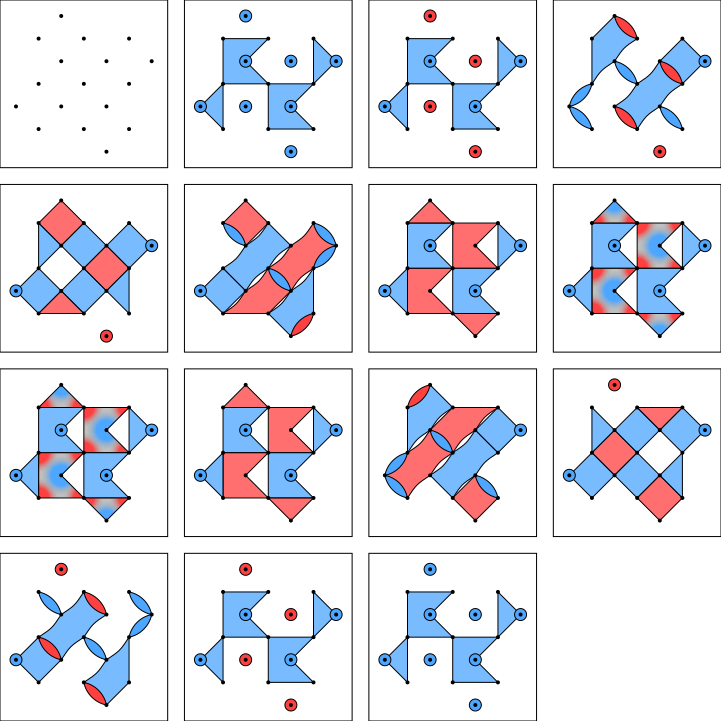

In [ ]:
surface_code_circuit.diagram("detslice-svg")

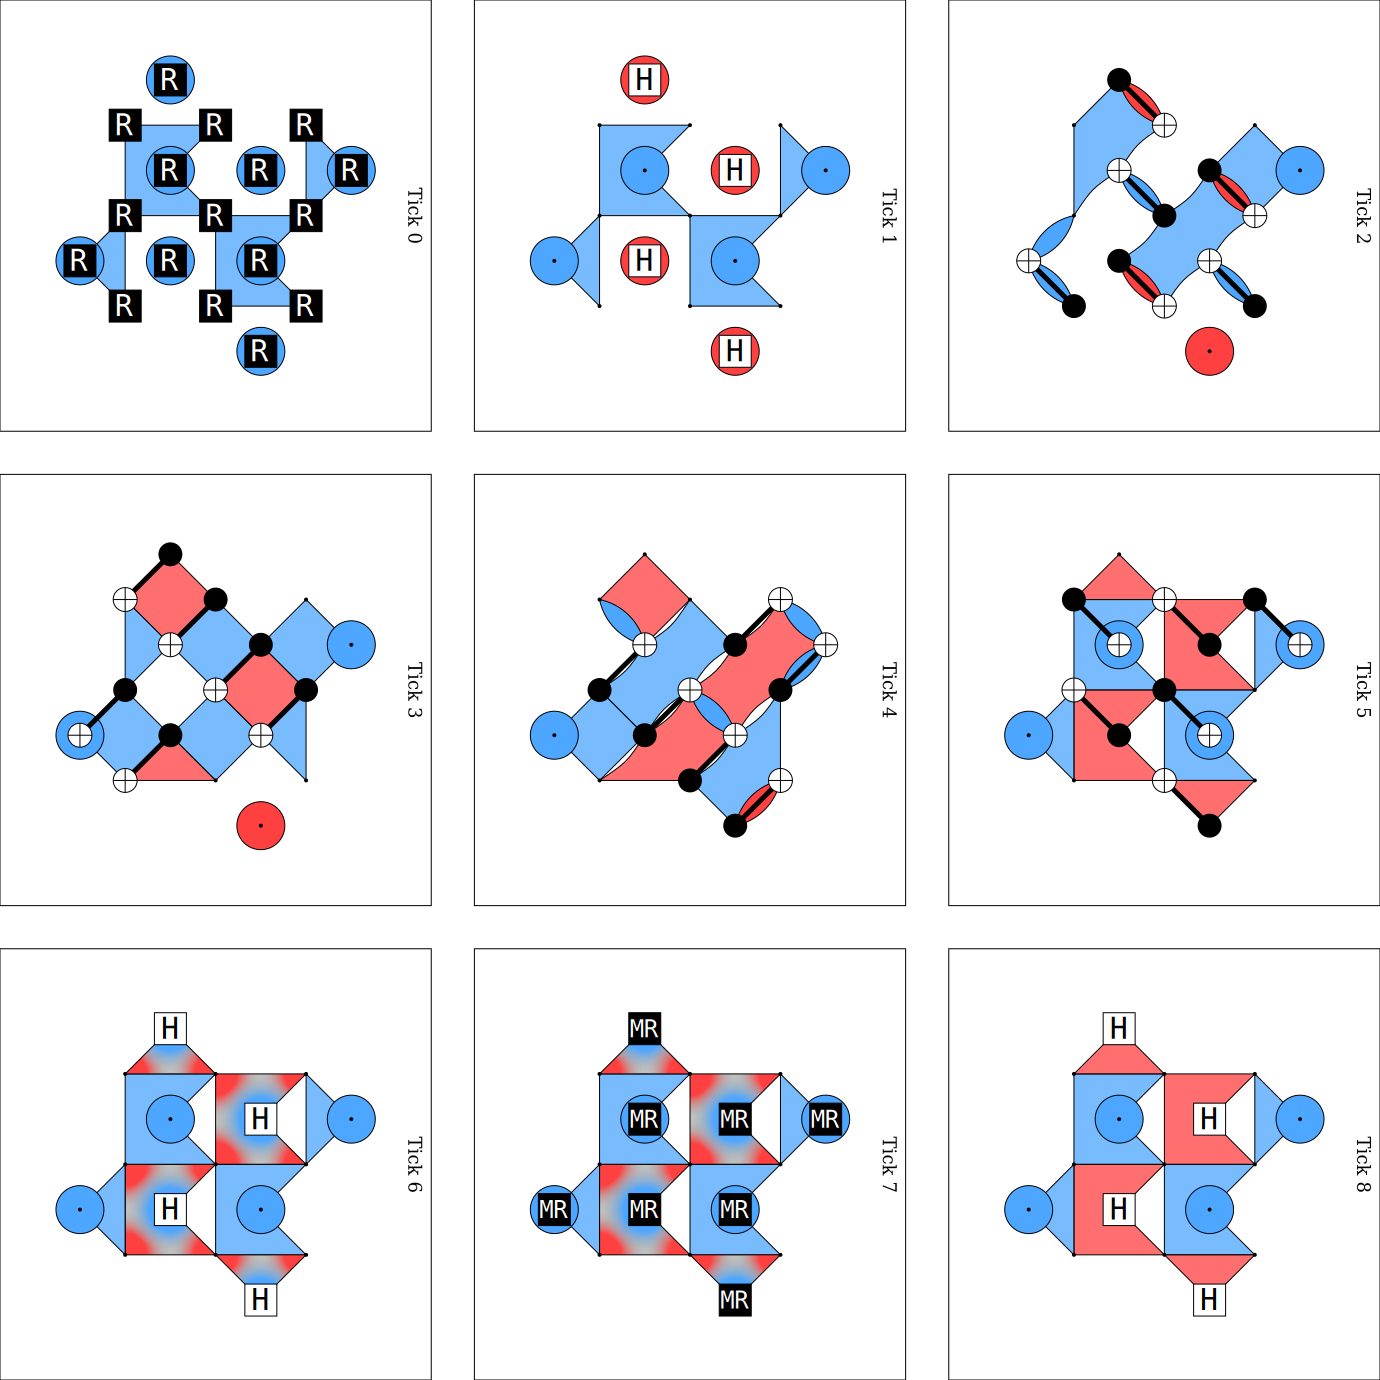

In [ ]:
surface_code_circuit.without_noise().diagram(
    "detslice-with-ops-svg",
    tick=range(0, 9),
)

In [ ]:
surface_code_circuit.diagram("matchgraph-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":3,"byteOffset":0,"componentType":5126,"count":9,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":4,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0,0.400000005960464],"min":[-0.400000005960464,0,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":5,"byteOffset":0,"componentType":5126,"count":9,"max":[0.400000005960464,0.400000005960464,0],"min":[-0.400000005960464,-0.400000005960464,0],"name":"circle_loop","type":"VEC3"},{"bufferView":6,"byteOffset":0,"componentType":5126,"count":456,"max":[19.0710678100586,27.4868335723877,11.7735033035278],"min":[-9.4868335723877,-9.4868335723877,-5.77350330352783],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":7,"byteOffset":0,"componentType":5126,"count":92,"max":[27.4868335723877,6,11.7735033035278],"min":[-1.07106828689575,-1.07106828689575,-5.77350330352783],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":2,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":3,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":4,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":5,"byteLength":108,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":6,"byteLength":5472,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":7,"byteLength":1104,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAMPQkD7D0JA+AAAAAPIwlrLNzMw+AAAAAMPQkL7D0JA+AAAAAM3MzL7yMBazAAAAAMHQkL7E0JC+AAAAAPLkozHNzMy+AAAAAMbQkD6/0JC+AAAAAM3MzD4AAAAA"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAAAAAADNzMw+w9CQPgAAAADD0JA+zczMPgAAAADyMJayw9CQPgAAAADD0JC+8jAWswAAAADNzMy+xNCQvgAAAADB0JC+zczMvgAAAADy5KMxv9CQvgAAAADG0JA+AAAAAAAAAADNzMw+"},{"byteLength":108,"name":"circle_loop","uri":"data:application/octet-stream;base64,zczMPgAAAAAAAAAAw9CQPsPQkD4AAAAA8jCWss3MzD4AAAAAw9CQvsPQkD4AAAAAzczMvvIwFrMAAAAAwdCQvsTQkL4AAAAA8uSjMc3MzL4AAAAAxtCQPr/QkL4AAAAAzczMPgAAAAAAAAAA"},{"byteLength":5472,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AAAAAAAAQEEAAAAAuLkQweg9cEGe90DAAAAAAAAAQEEAAAAAAADAQAAAwEAAAAAAAAAAAAAAQEEAAAAAAAAAAAAAQEEAAEBAAADAQAAAwEAAAAAAAABAQQAAQEEAAAAAAADAQAAAwEAAAAAAAADAQAAAwEAAAEBAAADAQAAAwEAAAAAAAADAQAAAwEAAAEBAAA

In [ ]:
# import os

# surface_code_tasks = [
#     sinter.Task(
#         circuit = stim.Circuit.generated(
#             "surface_code:rotated_memory_z",
#             rounds=d * 3,
#             distance=d,
#             after_clifford_depolarization=noise,
#             after_reset_flip_probability=noise,
#             before_measure_flip_probability=noise,
#             before_round_data_depolarization=noise,
#         ),
#         json_metadata={'d': d, 'r': d * 3, 'p': noise},
#     )
#     for d in [3, 5, 7]
#     for noise in [0.008, 0.009, 0.01, 0.011, 0.012]
# ]

# collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
#     num_workers=os.cpu_count(),
#     tasks=surface_code_tasks,
#     decoders=['pymatching'],
#     max_shots=1_000_000,
#     max_errors=5_000,
#     print_progress=True,
# )